In [ ]:
import pandas as pd




In [ ]:
from google.colab import files
uploaded=files.upload()





Saving heart.csv to heart.csv


In [5]:
df = pd.read_csv('heart.csv')
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (1025, 14)

Columns:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 no

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (241, 13) Test size: (61, 13)


Decision Tree Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:
 [[22  6]
 [ 6 27]]


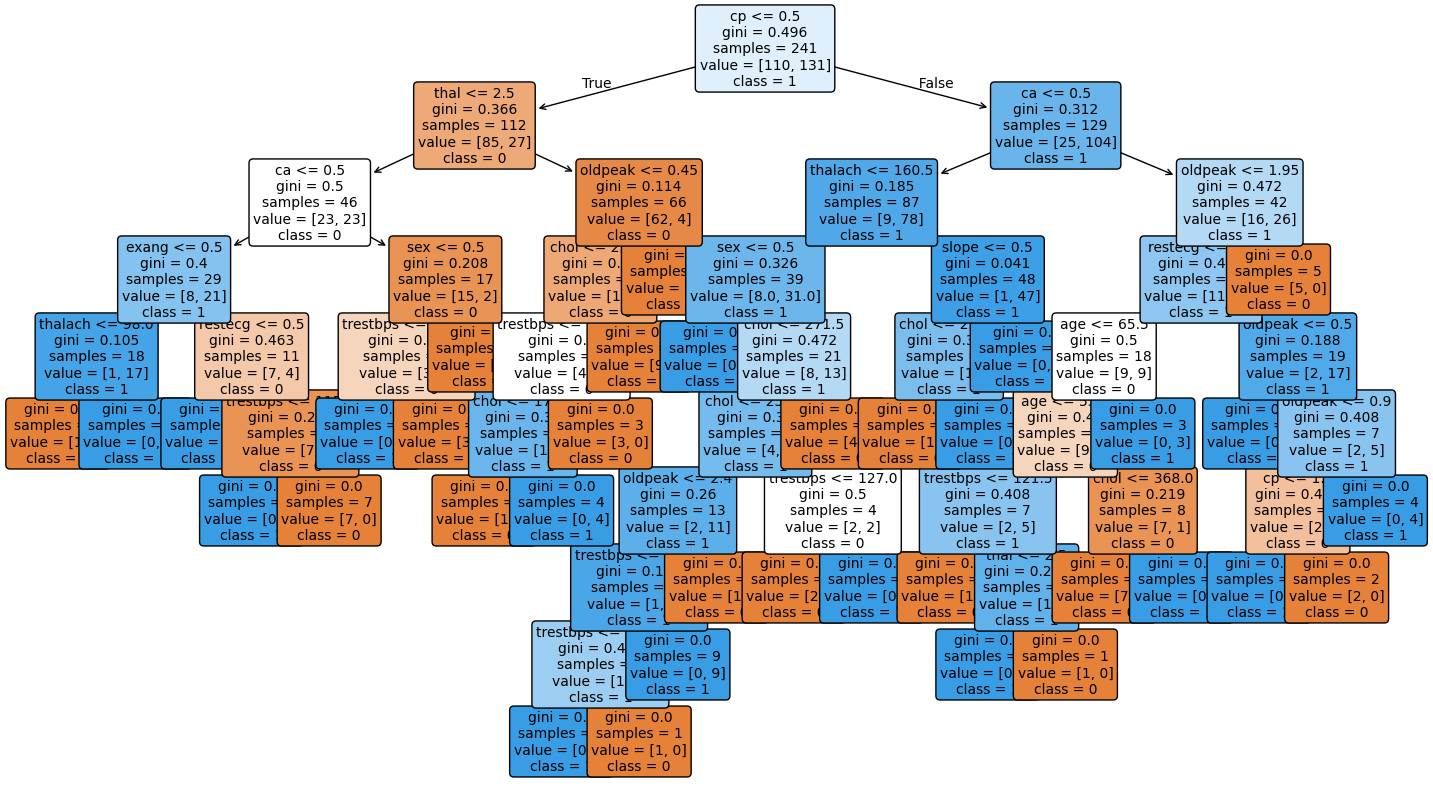

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(18,10))
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'],
          filled=True, rounded=True, fontsize=10)
plt.show()


#analyze overfitting


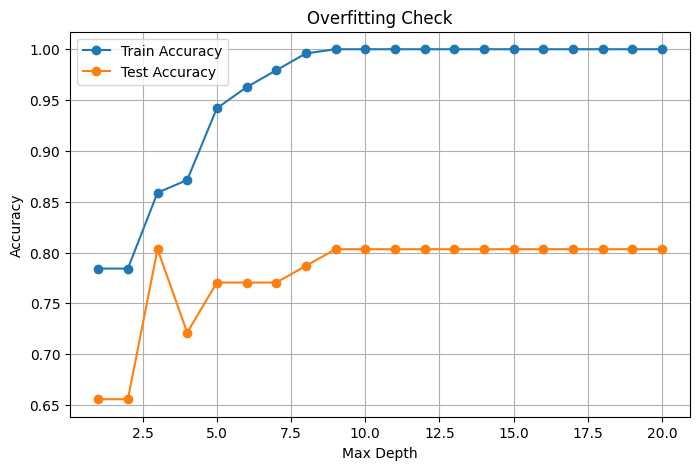

Best depth: 3


In [17]:
import numpy as np
train_scores = []
test_scores = []
depths = range(1, 21)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Check')
plt.legend()
plt.grid(True)
plt.show()


best_depth = depths[np.argmax(test_scores)]
print("Best depth:", best_depth)



#train random forest and compare accuracy


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7540983606557377
Random Forest ROC-AUC: 0.8614718614718615
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



#feature importances


Top Features:
 cp          0.173969
thalach     0.131634
ca          0.105700
oldpeak     0.096577
thal        0.090418
age         0.083049
exang       0.073679
trestbps    0.072088
chol        0.067384
sex         0.040229
dtype: float64


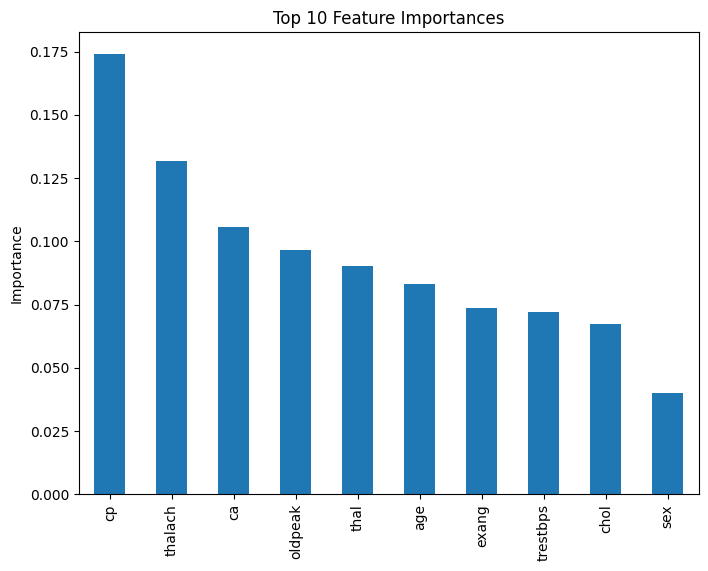

In [19]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", importances.head(10))

plt.figure(figsize=(8,6))
importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()


#cross validation


In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
print("Random Forest CV Accuracy: %.4f ± %.4f" % (rf_cv_scores.mean(), rf_cv_scores.std()))
dt_pruned = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_cv_scores = cross_val_score(dt_pruned, X, y, cv=cv, scoring='accuracy')
print("Pruned Decision Tree CV Accuracy: %.4f ± %.4f" % (dt_cv_scores.mean(), dt_cv_scores.std()))


Random Forest CV Accuracy: 0.8247 ± 0.0331
Pruned Decision Tree CV Accuracy: 0.7680 ± 0.0610
